In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Diabetes Example data.csv")
df.head()

,Blood Sugar Level,Diabetes
0,190,No
1,240,Yes
2,300,Yes
3,160,No
4,200,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Blood Sugar Level  10 non-null     int64 
 1   Diabetes           10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [5]:
df.isnull().sum()

Blood Sugar Level    0
Diabetes             0
dtype: int64

In [6]:
import seaborn as sns

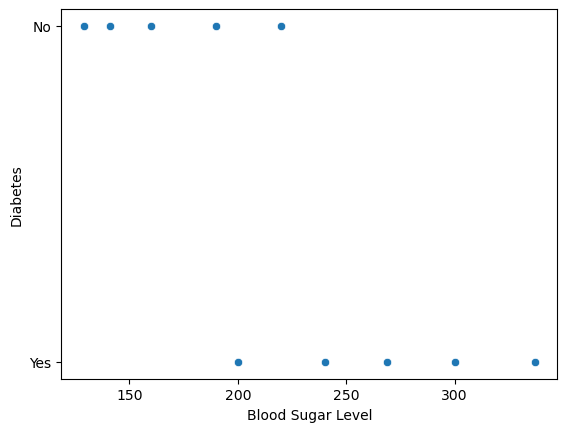

In [8]:
sns.scatterplot(x='Blood Sugar Level', y='Diabetes', data=df)
plt.show()

In [15]:
#convert into binary values
is_diabetes_column_converted_into_binary = df['Diabetes'].isin([1]).any(axis=0, skipna=True)
print(is_diabetes_column_converted_into_binary)

True


In [16]:
if not is_diabetes_column_converted_into_binary:
    df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
    is_diabetes_column_converted_into_binary = True
else:
    print('Diabetes_column_already_converted_binary')

Diabetes_column_already_converted_binary


In [17]:
df

,Blood Sugar Level,Diabetes
0,190,0
1,240,1
2,300,1
3,160,0
4,200,1
5,269,1
6,129,0
7,141,0
8,220,0
9,337,1


In [18]:
df.columns

Index(['Blood Sugar Level', 'Diabetes'], dtype='object')

In [19]:
# Split into X and y
y = df['Diabetes']
X = df['Blood Sugar Level']

In [21]:
import statsmodels.api as sm

In [22]:
X_sm = sm.add_constant(X)

In [28]:
logistic_Regression_model1 = sm.GLM(y, X_sm, family=sm.families.Binomial()).fit()

In [29]:
print(logistic_Regression_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.5838
Date:                Tue, 20 Jun 2023   Deviance:                       5.1676
Time:                        12:00:35   Pearson chi2:                     4.32
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5809
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.5243      9.35